# Haas Cascade

In [1]:
# import cv2
# import matplotlib.pyplot as plt

# def haas_cascade_face_detection(img, display = True):
#     # Load manually downloaded file
#     face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

#     # Proceed with detection
#     img = cv2.imread(img)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

#     if display:
#         for (x, y, w, h) in faces:
#             cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

#         plt.imshow(img)
#         plt.show()
#     else:
#         return faces

In [2]:
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

def haar_cascade_face_detection(img_path, display=True):
    # Use OpenCV’s packaged cascades
    cascade_path = Path(cv2.data.haarcascades) / "haarcascade_frontalface_default.xml"
    face_cascade = cv2.CascadeClassifier(str(cascade_path))
    if face_cascade.empty():
        raise RuntimeError(f"Could not load cascade from {cascade_path}")

    # Load image safely
    img = cv2.imread(str(img_path))
    if img is None:
        raise FileNotFoundError(f"Could not read image at: {img_path}")

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

    if display:
        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Convert BGR→RGB for matplotlib
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.show()
    else:
        return faces


# HOG + SVM (dlib)

In [3]:
import cv2
import dlib
from time import time
import matplotlib.pyplot as plt

In [4]:
hog_face_detector = dlib.get_frontal_face_detector()
hog_face_detector

In [5]:
def hogDetectFaces(image, hog_face_detector, display = True):

    height, width, _ = image.shape

    output_image = image.copy()

    imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    start = time()

    results = hog_face_detector(imgRGB, 1)

    end = time()

    for bbox in results:

        x1 = bbox.left()
        y1 = bbox.top()
        x2 = bbox.right()
        y2 = bbox.bottom()

        cv2.rectangle(output_image, pt1=(x1, y1), pt2=(x2, y2), color=(0, 255, 0), thickness=width//200)  

    if display:

        cv2.putText(output_image, text='Time taken: '+str(round(end - start, 2))+' Seconds.', org=(10, 65),
                    fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=width//700, color=(0,0,255), thickness=width//500)

        plt.figure(figsize=[15,15])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output");plt.axis('off');

    else:

        return output_image, results

# Facenet pytorch

In [ ]:
from facenet_pytorch import MTCNN
from PIL import Image
import torch

# Set device (GPU if available, otherwise CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load MTCNN model
mtcnn = MTCNN(keep_all=True, min_face_size=20, device=device)  # keep_all=True detects multiple faces

def detect_faces_facenet(image_path, display = True):
    """
    Detect faces using MTCNN from facenet-pytorch.

    Args:
        image_path (str or PIL.Image): Path to image file or PIL Image

    Returns:
        boxes (list of [x1, y1, x2, y2]): Detected face bounding boxes
        probs (list of float): Detection confidence scores
    """
    # Load image
    img = Image.open(image_path) if isinstance(image_path, str) else image_path

    # Run detection
    boxes, probs = mtcnn.detect(img)

    if display:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        if boxes is not None:
            for box in boxes:
                x1, y1, x2, y2 = [int(v) for v in box]
                cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)


        plt.imshow(img)
        plt.axis('off')
        plt.show()
    else:
        return boxes, probs

ModuleNotFoundError: No module named 'torch._prims_common'

# deepface

2025-09-02 22:33:07.989339: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-02 22:33:07.990602: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-02 22:33:07.996142: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-02 22:33:08.003713: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756845188.020064   34561 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756845188.02

dict_keys(['face', 'facial_area', 'confidence'])


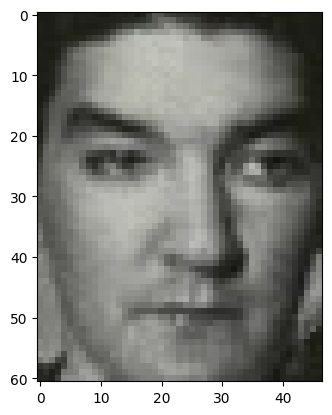

{'emotion': {'angry': np.float32(33.40562), 'disgust': np.float32(0.006851531), 'fear': np.float32(24.336472), 'happy': np.float32(0.2552435), 'sad': np.float32(27.35548), 'surprise': np.float32(3.726158), 'neutral': np.float32(10.914167)}, 'dominant_emotion': 'angry', 'region': {'x': 389, 'y': 152, 'w': 63, 'h': 63, 'left_eye': None, 'right_eye': None}, 'face_confidence': 0.9, 'age': 29, 'gender': {'Woman': np.float32(63.363617), 'Man': np.float32(36.636383)}, 'dominant_gender': 'Woman', 'race': {'asian': np.float32(4.3406195e-10), 'indian': np.float32(1.5152218e-09), 'black': np.float32(2.311553e-12), 'white': np.float32(99.99121), 'middle eastern': np.float32(0.0034050478), 'latino hispanic': np.float32(0.005381624)}, 'dominant_race': 'white'}


In [2]:
from deepface import DeepFace
import matplotlib.pyplot as plt


face = DeepFace.extract_faces("../data/source/images/1497325512-large.jpg", detector_backend="mtcnn")
dem = DeepFace.analyze("../data/source/images/1497325512-large.jpg")
print(face[0].keys())
plt.imshow(face[0]["face"])
plt.show()
print(dem[0])

In [3]:
print(face[0])

{'face': array([[[0.10588235, 0.10980392, 0.07843137],
        [0.10980392, 0.11372549, 0.08235294],
        [0.11372549, 0.11764706, 0.08627451],
        ...,
        [0.12156863, 0.12941176, 0.08627451],
        [0.10980392, 0.11764706, 0.07843137],
        [0.10980392, 0.11764706, 0.0745098 ]],

       [[0.10980392, 0.11372549, 0.08235294],
        [0.10588235, 0.10980392, 0.07843137],
        [0.11372549, 0.11764706, 0.08627451],
        ...,
        [0.11764706, 0.12156863, 0.09019608],
        [0.10980392, 0.11372549, 0.08235294],
        [0.10980392, 0.11372549, 0.08235294]],

       [[0.12156863, 0.1254902 , 0.09411765],
        [0.10980392, 0.11372549, 0.08235294],
        [0.11372549, 0.11764706, 0.08627451],
        ...,
        [0.10980392, 0.11372549, 0.08627451],
        [0.10588235, 0.10980392, 0.07843137],
        [0.10588235, 0.11372549, 0.08235294]],

       ...,

       [[0.2       , 0.20392157, 0.18431373],
        [0.23921569, 0.24313725, 0.22352941],
        [0.19

[{'face': array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.01176471, 0.00784314],
        [0.        , 0.01568627, 0.01568627],
        [0.        , 0.01568627, 0.01960784]],

       [[0.        , 0.        , 0.00392157],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.00392157, 0.        ],
        ...,
        [0.        , 0.00784314, 0.00784314],
        [0.        , 0.01176471, 0.01176471],
        [0.        , 0.01176471, 0.01176471]],

       [[0.        , 0.        , 0.00784314],
        [0.        , 0.        , 0.00784314],
        [0.        , 0.00392157, 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.        ],
        [0.        , 0.        , 0.        ],
        [0.00392157, 0.01176471, 0.01568627]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0. 

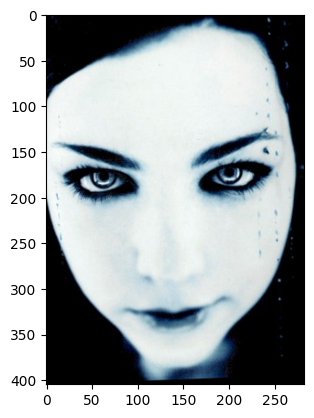

In [5]:
from deepface import DeepFace
import matplotlib.pyplot as plt


face = DeepFace.extract_faces("../data/source/images/36133922467-px_500.jpg", detector_backend="mtcnn")
print(face)
plt.imshow(face[0]["face"])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

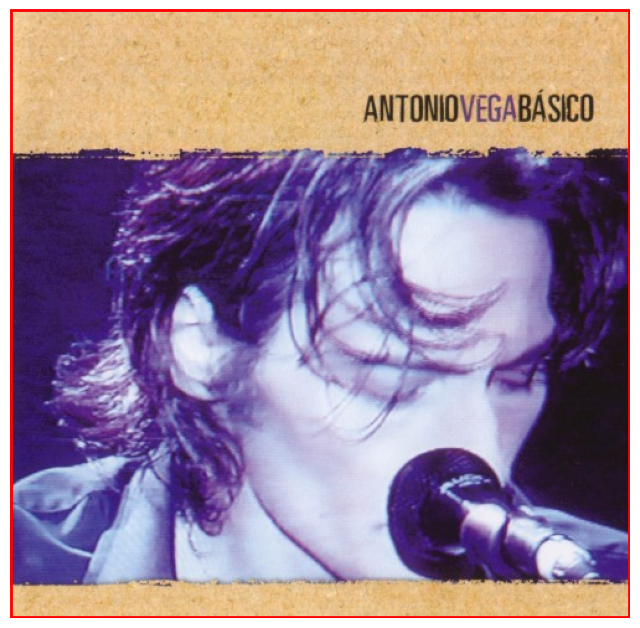

In [37]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from deepface import DeepFace
import cv2

# Path to your image
img_path = "../data/source/images/1497325512-large.jpg" # mag fields
img_path = "../data/source/images/14420632959-px_500.jpg" # blonde
# img_path = "../data/source/images/30887653467-px_500.jpg" # asap
img_path = "../data/source/images/13254251121-large.jpg" # basico






# Load image with OpenCV (BGR → RGB)
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Extract faces
faces = DeepFace.extract_faces(img_path, enforce_detection=False, detector_backend="retinaface")

# Plot the original image with bounding boxes
fig, ax = plt.subplots(1, figsize=(8, 8))
ax.imshow(img_rgb)

for f in faces:
    fa = f["facial_area"]
    x, y, w, h = fa["x"], fa["y"], fa["w"], fa["h"]
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor="r", facecolor="none")
    ax.add_patch(rect)

plt.axis("off")
plt.show


# Tests

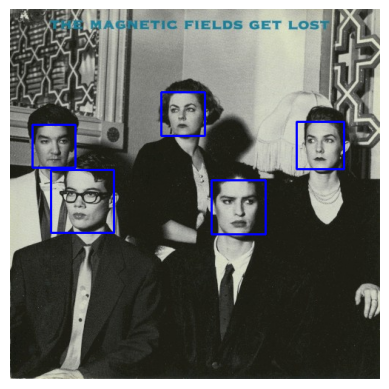

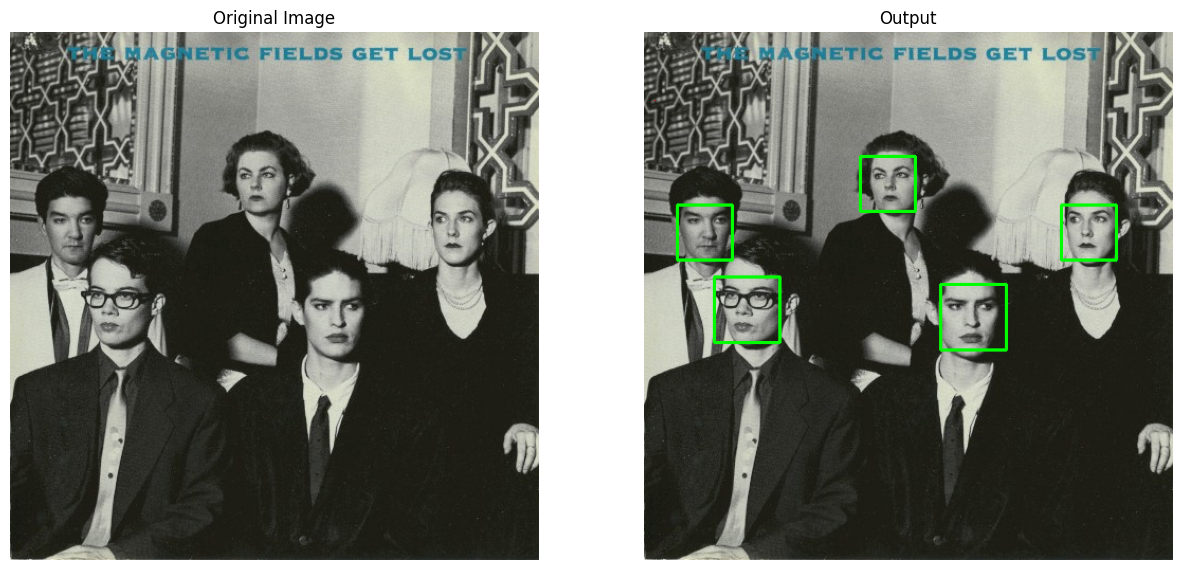

In [ ]:
magnetic_fields_cover = "../data/source/images/1497325512-large.jpg"
haar_cascade_face_detection(magnetic_fields_cover)
hogDetectFaces(cv2.imread(magnetic_fields_cover), hog_face_detector, display=True)

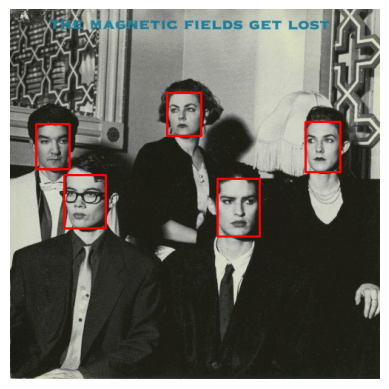

In [ ]:
detect_faces_facenet(magnetic_fields_cover)

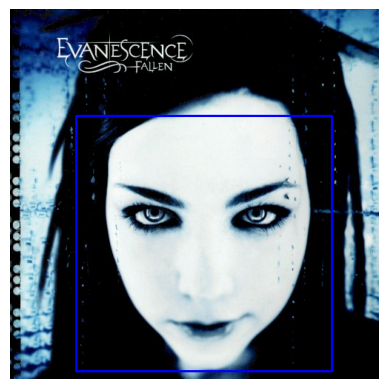

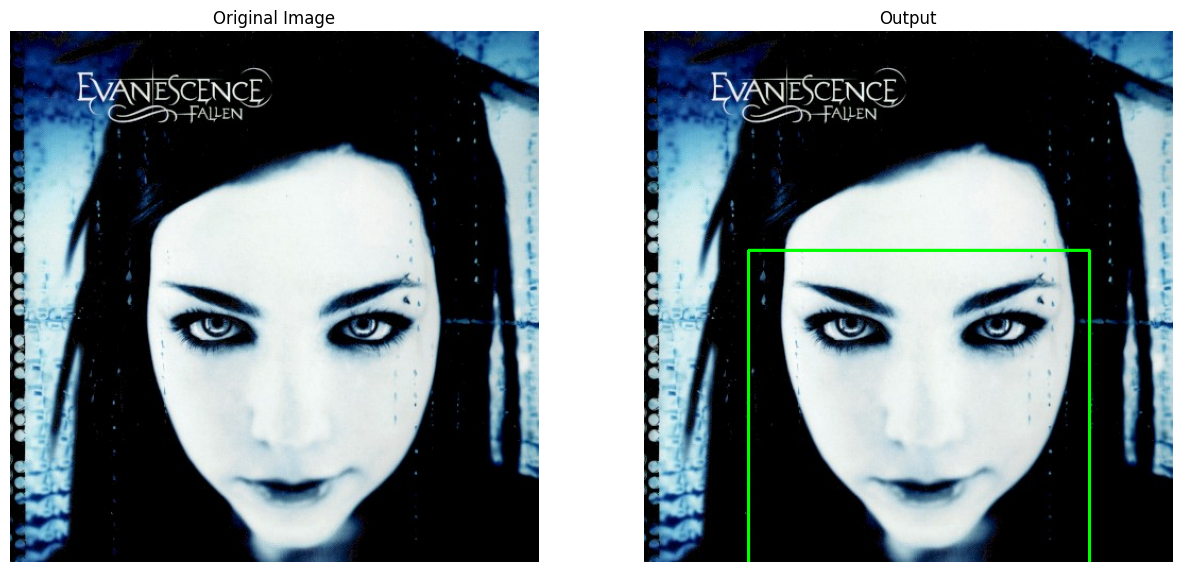

In [ ]:
fallen_cover = "../data/source/images/36133922467-px_500.jpg"
haar_cascade_face_detection(fallen_cover)
hogDetectFaces(cv2.imread(fallen_cover), hog_face_detector, display=True)

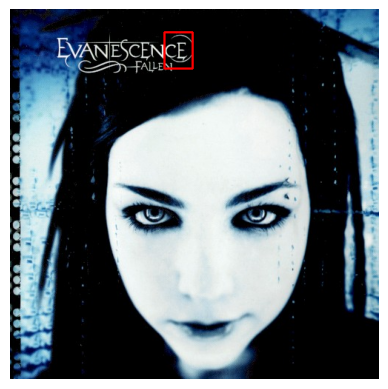

In [ ]:
detect_faces_facenet(fallen_cover)

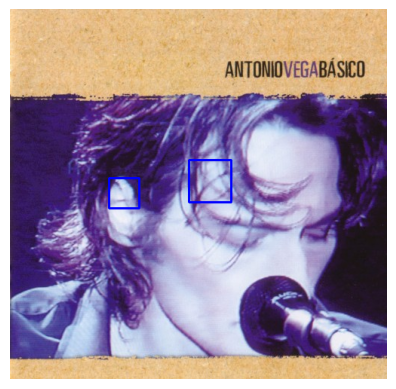

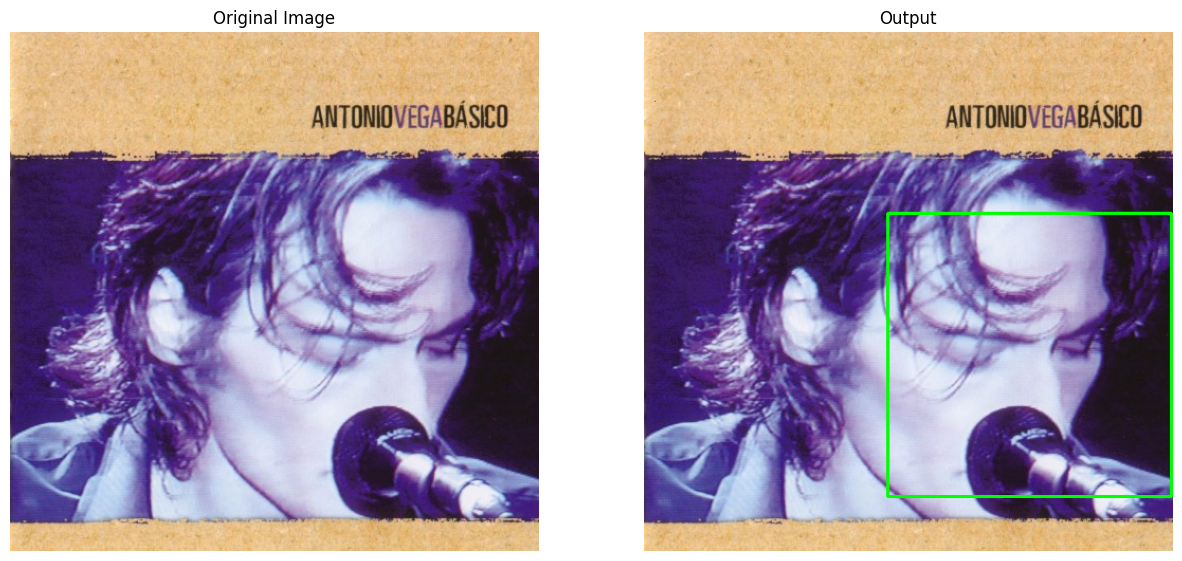

In [ ]:
basico_cover = "../data/source/images/13254251121-large.jpg"
haar_cascade_face_detection(basico_cover)
hogDetectFaces(cv2.imread(basico_cover), hog_face_detector, display=True)

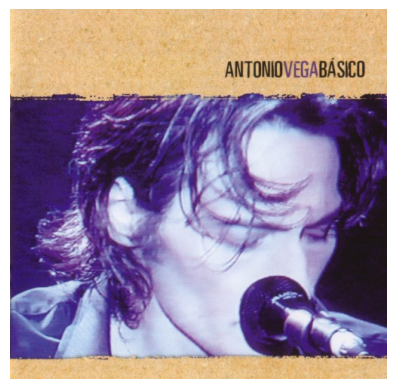

In [ ]:
detect_faces_facenet(basico_cover)

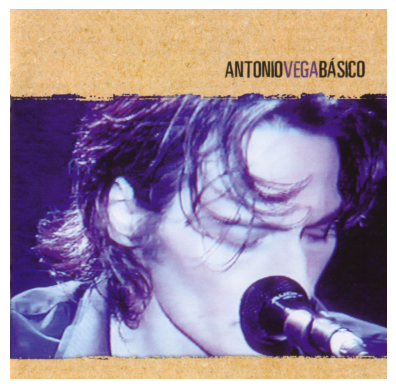

In [ ]:
basico_cover_original = "../data/source/images/basico.jpg"
detect_faces_facenet(basico_cover_original)

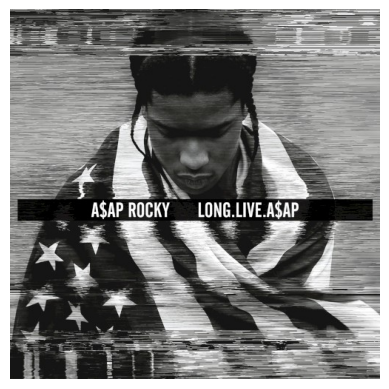

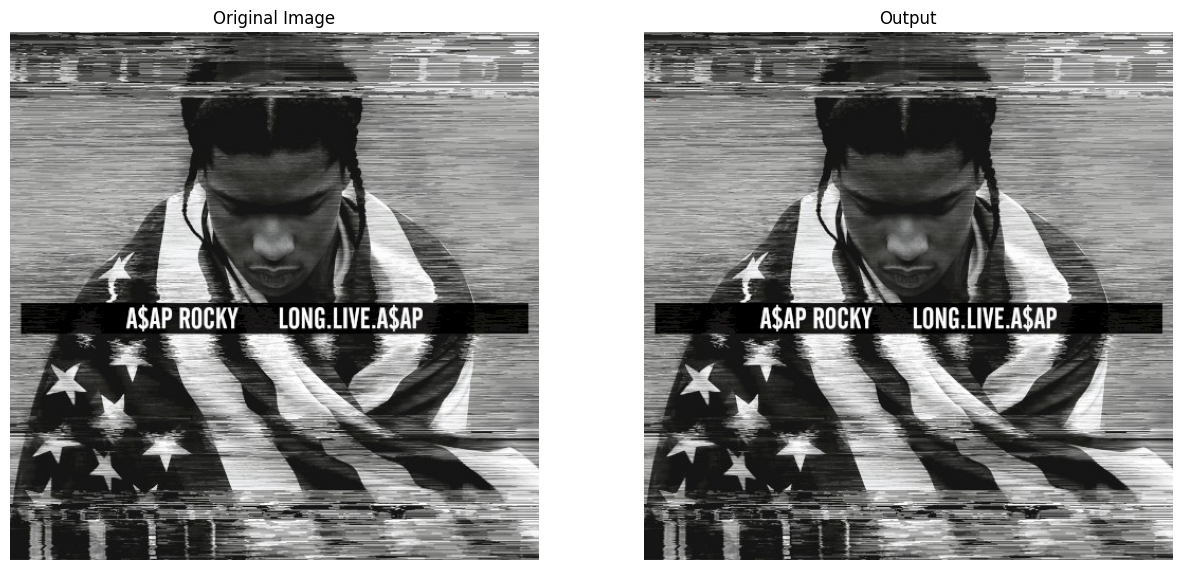

In [ ]:
long_live_asap_cover = "../data/source/images/30887653467-px_500.jpg"
haar_cascade_face_detection(long_live_asap_cover)
hogDetectFaces(cv2.imread(long_live_asap_cover), hog_face_detector, display=True)

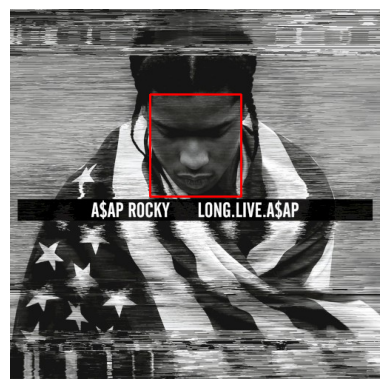

In [ ]:
detect_faces_facenet(long_live_asap_cover)

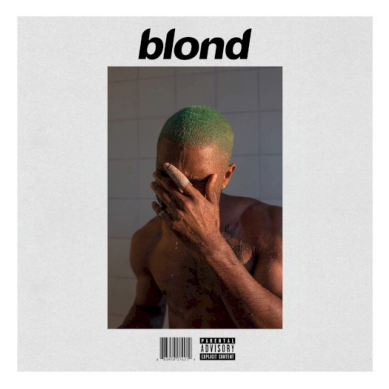

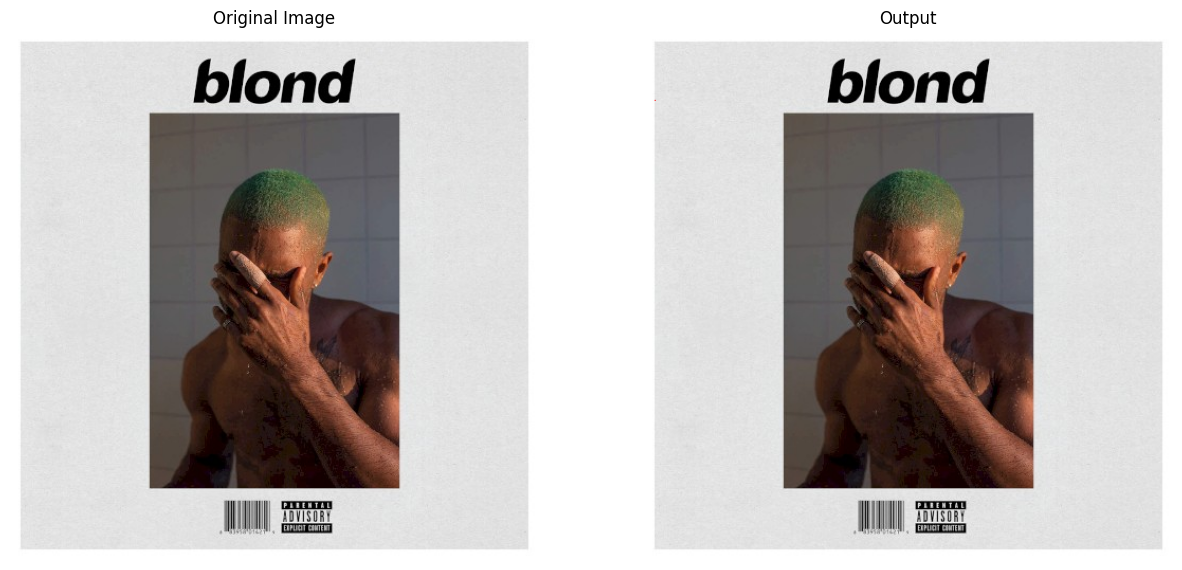

In [ ]:
frank_ocean_cover = "../data/source/images/14420632959-px_500.jpg"
haar_cascade_face_detection(frank_ocean_cover)
hogDetectFaces(cv2.imread(frank_ocean_cover), hog_face_detector, display=True)

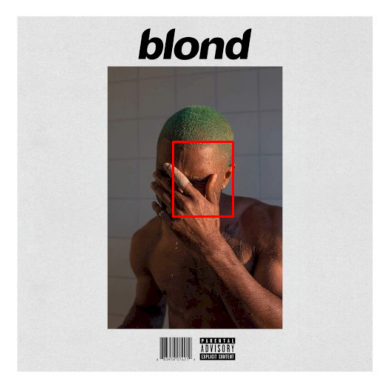

In [ ]:
detect_faces_facenet(frank_ocean_cover)

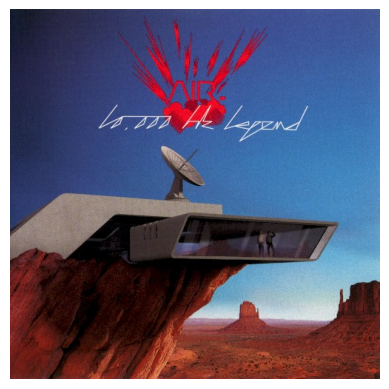

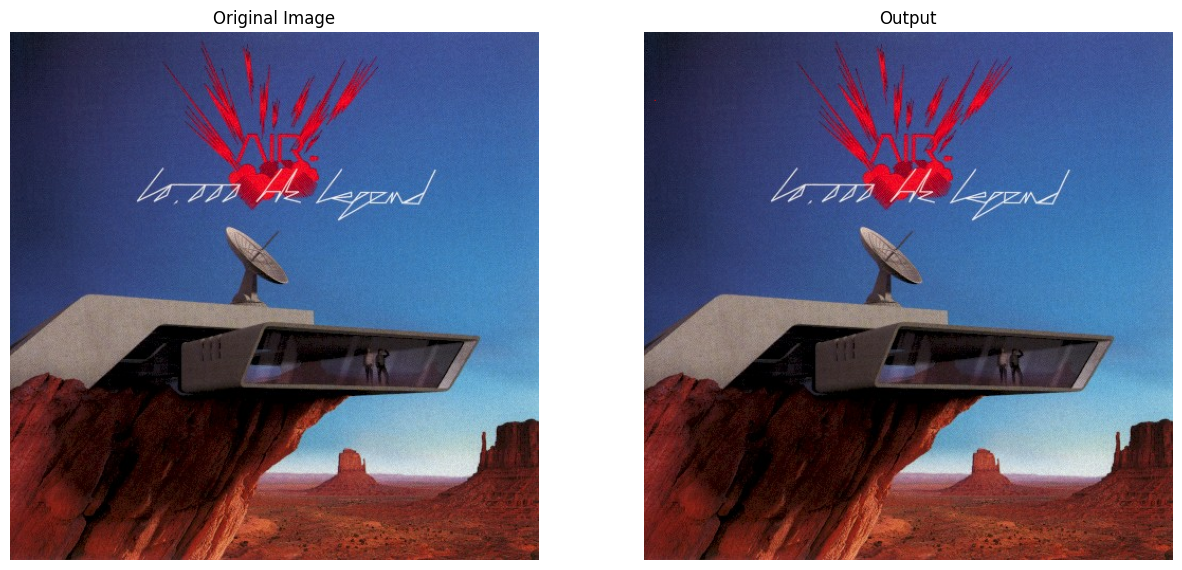

In [ ]:
air_cover = "../data/source/images/40654268451-px_500.jpg"
haar_cascade_face_detection(air_cover)
hogDetectFaces(cv2.imread(air_cover), hog_face_detector, display=True)

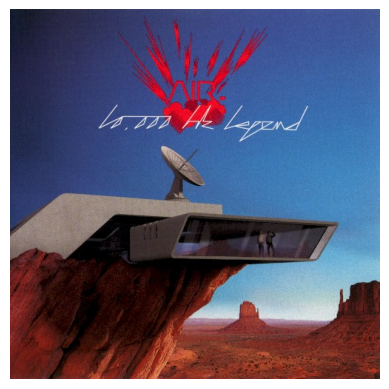

In [ ]:
detect_faces_facenet(air_cover)

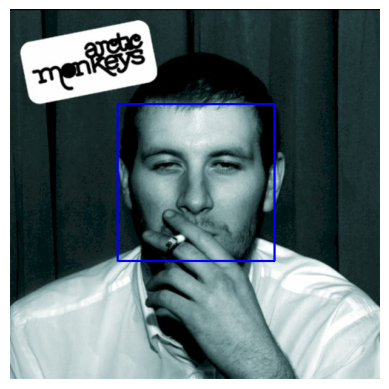

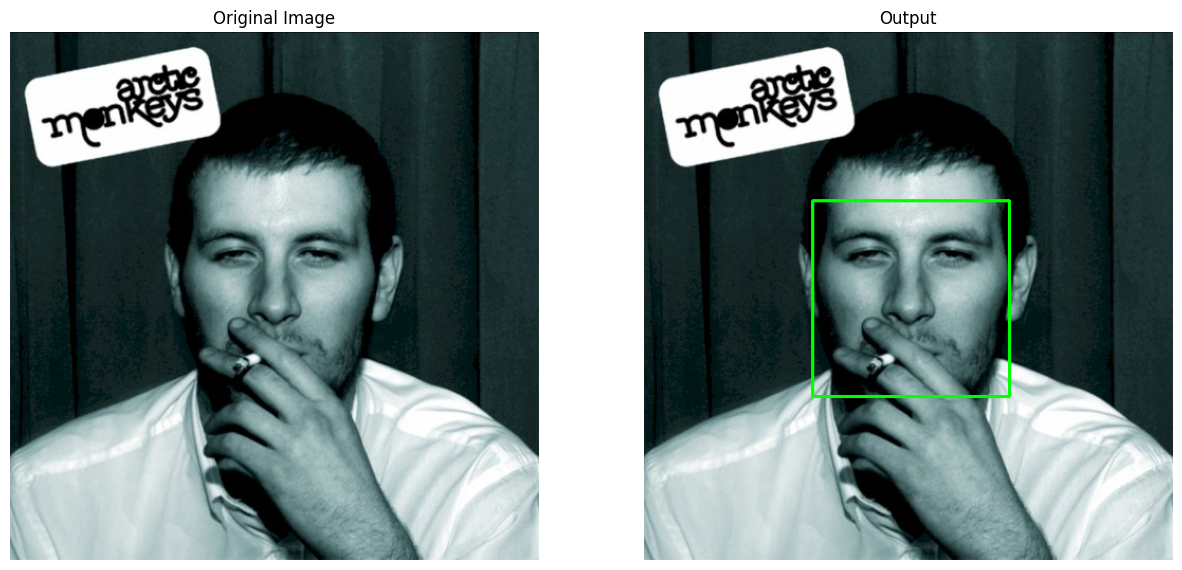

In [ ]:
arctic_monkeys_cover = "../data/source/images/36261684302-px_500.jpg"
haar_cascade_face_detection(arctic_monkeys_cover)
hogDetectFaces(cv2.imread(arctic_monkeys_cover), hog_face_detector, display=True)

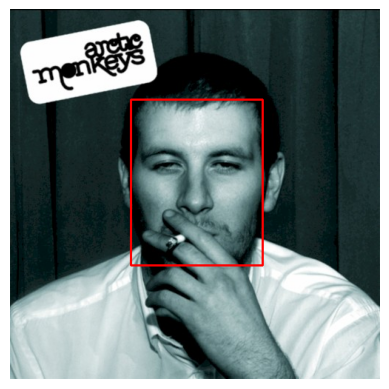

In [ ]:
detect_faces_facenet(arctic_monkeys_cover)

# TODO

Fix opencv installation

Tune parameters haas cascade

Do evaluation with a mannual annotated dataset and compare techniques.